# Week 10 Homework
##### Please be sure your functions work for vectors with a size of three and matrices that are 3x3 and use appropriate error handling. Bonus points if you can further generalize them for larger vectors and matrices. 

In [3]:
from pylatex import Document, Section, Subsection, Tabular
from pylatex import Math, TikZ, Axis, Plot, Figure, Matrix, Alignat
from pylatex.utils import italic
import numpy as np
from numpy import linalg as la
import math
import pandas as pd

##### 1.	Explain the dot product and cross product in your own words in markdown. Use LaTeX to properly show the equations.

The dot product of two vectors is the sum of the products of the corresponding elements in the vectors.  It is a number that gives an indication of the extent to which two vectors move in the same direction.  Two vectors that run perpendicular to one another will have a dot product of zero.  Two vectors that overlap one another (and therefor move in exactly the same direction) will have a dot product equal to the parallel component of the magnitude of one vector in relation to the other multiplied by the magnitude of the other vector.

Unlike dot product, the cross product of two vectors yields another vector.  This vector runs perpendicular to each of the two vectors and, hence, perpendicular to the plane containing those vectors.  The magnitude of the cross product is equal to the magnitude of the perpendicular component of one vector multiplied by the magnitude of the second vector in its entirety.

$$\vec{A} \cdot \vec{B}=\left | \vec{A} \right |\left | \vec{B} \right |\cos\theta $$

$$\vec{A} \times \vec{B}=\left | \vec{A} \right |\left |\vec{B} \right |\sin\theta $$

##### 2.	Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 

In [4]:
def angle_between(v1,v2):
    v1 = np.ravel(v1)
    v2 = np.ravel(v2)
    try:
        dotprod = np.dot(v1, v2)
        v1_mag = la.norm(v1)
        v2_mag = la.norm(v2)
        denom = v1_mag * v2_mag
        if denom == 0:
            print("Must use vectors with nonzero magnitude.  Cannot divide by zero.")
        else:    
            ratio = dotprod/denom
            theta = math.acos(ratio)
            return(theta)
    except Exception as e:
        print(e)

In [5]:
# Create two vectors to test the error handling
a2 = np.array([0, 0, 0, 0, 0])
b2 = np.array([9, 7, 5, 3, 1])

angle_between(a2,b2)

Must use vectors with nonzero magnitude.  Cannot divide by zero.


In [6]:
# Create two vectors to test the function's success
c2 = np.array([3, 5, 7, 9, 11])
d2 = np.array([9, 7, 5, 3, 1])

angle_between(c2,d2)

0.89880829982002

In [7]:
# Create two column vectors to test the function's success
e2 = np.array([[3],
              [5],
              [7],
              [-4]])
f2= np.array([[6],
              [2],
              [-5],
              [-3]])
angle_between(e2,f2)

1.5123464147393408

##### 3.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).


In [8]:
def row_dot(A, r1, r2):
    try:
        if r1 <= 0 or r2 <= 0:
            print("Enter positive row numbers only.")
        else:
            dot=np.dot(A[r1-1],A[r2-1])
            print(dot)
    except Exception as e:
        print(e)

In [9]:
# Create matrix B to test function success
B = [[4,3,5,8],
     [-3,6,9,2],
     [0,2,-7,1],
     [-5,-1,-10,-3]]

row_dot(B,2,4)

-87


In [10]:
# Test error handling
row_dot(B,-2,2)

Enter positive row numbers only.


In [11]:
# Test error handling
row_dot(B,1,6)

list index out of range


##### 4.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?


In [12]:
def matrix_division(m1,m2):
    try:
        m1_inv = la.inv(m1) # for multiplication later
        m2_trans = np.transpose(m2) # for dot products later
        # Create a zero matrix to house the result. Dimensions are equal to the number of rows in matrix m1_inv and the number
        # of columns in matrix m2 (same as number of rows in m2 tranpose).
        quotient = np.zeros((len(m1_inv), len(m2_trans)))
        for i in range(len(m1)):
            for j in range(len(m2_trans)):
                quotient[i][j] = np.dot(m1_inv[i],m2_trans[j])
        print(quotient)
    except Exception as e:
        print(e)

In [13]:
# Test function success
M = np.array([[6,5,3,-7],
              [2,-1,2,-3],
              [-4,2,8,6],
              [3,-1,-9,-8]])

N = np.array([[4,9,-3,6,1,7],
              [-2,-3,-5,7,9,2],
              [3,-1,7,5,-2,-1],
              [-1,5,7,4,-4,-2]])

matrix_division(M,N)

[[-0.45545977 -0.46408046 -5.64224138 -3.70833333  1.83908046  1.65948276]
 [ 1.24568966  2.13362069  2.15086207 -0.375      -2.75862069  0.07327586]
 [-0.08333333 -0.58333333 -0.25        1.58333333  1.33333333  0.25      ]
 [-0.10775862 -0.40948276 -2.97844828 -3.625       0.03448276  0.58189655]]


In [14]:
# Test error handling
O = np.array([[3,-6],
              [-1,2]])
P = np.array([[4,1,-9,8],
              [-2,6,3,-10]])

matrix_division(O,P)

Singular matrix


In [15]:
matrix_division(M,P)

shapes (4,) and (2,) not aligned: 4 (dim 0) != 2 (dim 0)


##### 5.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. 

In [16]:
def is_orthogonal(v1,v2,tol):
    try:
        if len(v1) != len(v2):
            print('column vectors must be of equal size')
        elif tol <= 0:
            print('scalar value must be positive')
        else:
            v1 = np.ravel(v1)
            v2 = np.ravel(v2)
            angle = angle_between(v1,v2)
            if abs(math.pi/2-angle)<tol:
                print('1')
            else:
                print('0')
    except Exception as e:
        print(e)

In [17]:
# Test cases for problem 5
a5 = np.array([[1],
              [0.001]])
b5 = np.array([[0.001],
              [1]])
# output: 1
is_orthogonal(a5,b5,0.01)

1


In [18]:
# output: 0
is_orthogonal(a5,b5,0.001)

0


In [19]:
# output: 0
c5 = np.array([[1], [0.001]])
d5 = np.array([[1], [1]])
is_orthogonal(c5,d5,0.01)

0


In [20]:
# output: 1
e5 = np.array([[1], [1]])
f5 = np.array([[-1], [1]])
is_orthogonal(e5,f5,1e-10)

1


##### 6.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 2 and 5 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 2 and 5. 


In [21]:
class vector_calculator():
    def __init__(self,vector1,vector2):
        self.vector1 = np.ravel(vector1)
        self.vector2 = np.ravel(vector2)
        
        
    def angle_between(self):
        try:
            dotprod = np.dot(self.vector1, self.vector2)
            vector1_mag = la.norm(self.vector1)
            vector2_mag = la.norm(self.vector2)
            denom = vector1_mag * vector2_mag
            if denom == 0:
                print("Must use vectors with nonzero magnitude.  Cannot divide by zero.")
            else:    
                ratio = dotprod/denom
                theta = math.acos(ratio)
                return(theta)
        except Exception as e:
            print(e)
    
    def is_orthogonal(self,tol=0.01):
        try:
            if len(self.vector1) != len(self.vector2):
                print('column vectors must be of equal size')
            elif tol <= 0:
                print('scalar value must be positive')
            else:
                v1 = np.ravel(self.vector1)
                v2 = np.ravel(self.vector2)
                angle = angle_between(v1,v2)
                if abs(math.pi/2-angle)<tol:
                    print('1')
                else:
                    print('0')
        except Exception as e:
            print(e)

In [22]:
# copied vectors here for reference
c2 = np.array([3, 5, 7, 9, 11])
d2 = np.array([9, 7, 5, 3, 1])

# Create object using one test case from #2
object_1 = vector_calculator(c2,d2)

# Test angle_between function inside class
object_1.angle_between()

0.89880829982002

In [23]:
# copied vectors here for reference
e2 = np.array([[3],
              [5],
              [7],
              [-4]])
f2= np.array([[6],
              [2],
              [-5],
              [-3]])

# Create object using other test case from #2
object_2 = vector_calculator(e2,f2)

# Test angle_between function inside class
object_2.angle_between()

1.5123464147393408

In [24]:
# Test cases from problem 5
a5 = np.array([[1],
              [0.001]])
b5 = np.array([[0.001],
              [1]])

# Create object using first test case from #5
object_3 = vector_calculator(a5,b5)

# output: 1
object_3.is_orthogonal()

1


In [25]:
# Use object_3 for second test case from #5, changing tol value

# output: 0
object_3.is_orthogonal(tol=0.001)

0


In [26]:
# More test cases from problem 5
c5 = np.array([[1], [0.001]])
d5 = np.array([[1], [1]])

# Create object using third test case from #5
object_4 = vector_calculator(c5,d5)

# output: 0
object_4.is_orthogonal()

0


In [27]:
# Even more test cases from problem 5  :)
e5 = np.array([[1], [1]])
f5 = np.array([[-1], [1]])

# Create object using fourth test case from #5
object_5 = vector_calculator(e5,f5)

# output: 1
object_5.is_orthogonal(tol=1e-10)

1


#### 7.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!


In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importing data (with .data) to show features of each sample
breast = load_breast_cancer()
breast_data = breast.data
# Import labels (with .target) to show outcome of each sample (benign or malignant)
breast_labels = breast.target

# list of all features WITHOUT 'label'
features = breast.feature_names
#list of all features WITH 'label' included
features_labels = np.append(features,'label')
# reshape it to a column to prep for concatenation
labels = np.reshape(breast_labels,(569,1))

# concatenate labels with data to create a dataframe
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

# name columns of dataframe with features (with 'label' included)
breast_dataset.columns = features_labels
# change label column from numerical data to words for clarity
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

# select the data from the features columns (intentionally leaving out the 'label' column) for PCA
x = breast_dataset.loc[:, features].values
# normalize the features
x = StandardScaler().fit_transform(x) 

# check that mean is (essentially) 0 and standard deviation is 1
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [48]:
# convert to a tabular format and create dataframe containing normalized data
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalized_breast = pd.DataFrame(x,columns=feat_cols)

# apply PCA to reduce data to THREE principal components
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)
# create dataframe with only the two principal components
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1',
                                                                                 'principal component 2',
                                                                                 'principal component 3'])
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


###### This means that about 72% of the data set is contained within the first three principal components.

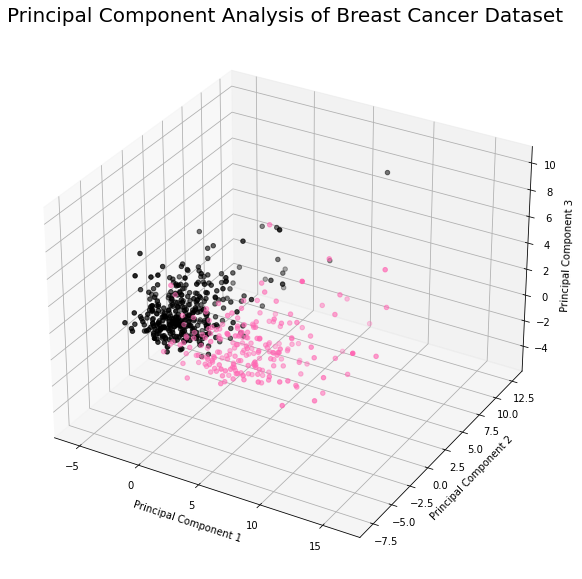

In [62]:
# Create 3D scatter plot using principal components 1, 2, & 3

# Import libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
 
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")

targets = ['Benign', 'Malignant']
colors = ['hotpink', 'black']
 
# Creating plot
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    x = principal_breast_Df.loc[indicesToKeep, 'principal component 1']            
    y = principal_breast_Df.loc[indicesToKeep, 'principal component 2']
    z = principal_breast_Df.loc[indicesToKeep, 'principal component 3']
    ax.scatter3D(x, y, z, c= color)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)

#ax.set_title("Principal Component Analysis of Breast Cancer Dataset")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

    
# show plot
plt.show()

#### PCA stands for 'principal component analysis.'  It is used for the purpose of condensing large amounts of data by searching for the components with the greatest variability.  These components are called 'principal components.'  The reasoning behind PCA is based on the thought that components with greater variability tell us more about a data set since components with less variability tend to resemble one another when normalized.  Because they resemble one another, they provide much less noteworthy data than the principal components do.